# 介紹

一旦確定了一組具有一定潛力的特徵，就可以開始開發它們了。在本課程中，您將學習一些可以完全在Pandas中完成的常見轉換。 如果您感到生疏，我們會為您提供有關[pandas的絕佳課程](https://www.kaggle.com/learn/pandas)。

在本課中，我們將使用四個具有一系列特徵類型的數據集：
- [美國交通事故](https://www.kaggle.com/sobhanmoosavi/us-accidents)
- [1985年的汽車](https://www.kaggle.com/toramky/automobile-dataset)
- [混凝土配方](https://www.kaggle.com/sinamhd9/concrete-comprehensive-strength)
- [客戶生命週期價值](https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data)。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

accidents = pd.read_csv("./data_set/Accidents.csv")
concrete = pd.read_csv("./data_set/Concrete_Data.csv")
customer = pd.read_csv("./data_set/Customer.csv")
autos = pd.read_csv("./data_set/Automobile_data.csv")

In [23]:
# autos = pd.read_csv("./data_set/Automobile_data.csv")

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
<strong>發現新特徵的竅門</strong>
<ul>
<li>了解功能。 請參閱數據集的<em>數據文檔</em>（如果有）。
<li>研究問題領域以獲取<strong>領域知識</strong>。 如果您的問題是預測房價，則可以對房地產進行一些研究。 Wikipedia可能是一個很好的起點，但是書籍和<a href="https://scholar.google.com/">期刊文章</a>通常會提供最佳信息。
<li>研究以前的工作。 過去Kaggle比賽中的<a href="https://www.kaggle.com/sudalairajkumar/winning-solutions-of-kaggle-competitions">解決方案記錄</a>是一個很好的資源。
<li>使用數據視覺化。 視覺化可以揭示特徵分佈中的病理(pathologies)或可以簡化的複雜關係。 在完成特徵工程過程時，請確保視覺化數據集。
<ul>
</blockquote>

# 數學變換 Mathematical Transforms

數值特徵之間的關係通常通過數學公式來表達，在領域研究中經常會遇到這些數學公式。在Pandas中，您可以將算術運算應用於列，就像它們是普通數字一樣。

在汽車數據集中，有描述汽車引擎的特徵。 研究產生了用於創建潛在有用的新特徵的各種公式。 例如，“stroke ratio” 是衡量引擎效率與性能比較的指標：

In [24]:
autos = autos[autos['price'] != '?']
autos = autos[autos['bore'] != '?']
autos.reset_index(drop=True,inplace=True)

autos.stroke = pd.to_numeric(autos.stroke)
autos.bore = pd.to_numeric(autos.bore)

In [26]:
autos["stroke_ratio"] = autos.stroke / autos.bore
autos[["stroke", "bore", "stroke_ratio"]].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


組合越複雜，模型的學習就越困難，例如引擎“排氣量(displacement)”的公式，即功率的度量：

In [ ]:
arr = []
for v in autos['num-of-cylinders']:
    if v == 'four':
        arr.append(4)
    elif v == 'five':
        arr.append(5)
    elif v == 'six':
        arr.append(6)
    elif v == 'eight':
        arr.append(8)
    elif v == 'three':
        arr.append(3)
    else:
        arr.append(12)
autos['num-of-cylinders'] = arr

In [38]:
autos["displacement"] = (
    np.pi * ((0.5 * autos.bore) ** 2) * autos.stroke * autos['num-of-cylinders']
)

數據視覺化可以建議轉換，通常是通過**冪(powers)**或**對數(logarithms)**對特徵進行“重塑(reshaping)”。 例如，美國事故中WindSpeed的分佈嚴重偏倚(skewed)。 在這種情況下，對數可以有效地將其標準化：

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


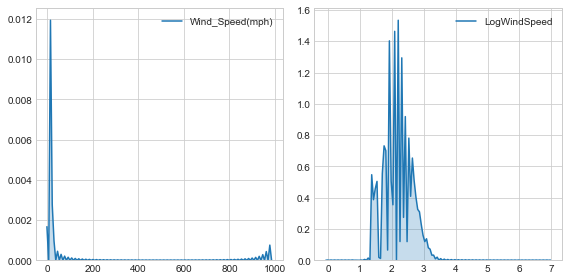

In [42]:
# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
accidents["LogWindSpeed"] = accidents['Wind_Speed(mph)'].apply(np.log1p)

# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents['Wind_Speed(mph)'], shade=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1]);

在[Data Cleaning](https://www.kaggle.com/learn/data-cleaning)中查看有關[標準化的課程](https://www.kaggle.com/alexisbcook/scaling-and-normalization)，您還將了解Box-Cox轉換，這是一種非常通用的標準化方法。

# 記數 Counts

例如，描述某種事物存在或不存在的特徵通常是成對出現的，即一組疾病的危險因素。 我們可以透過創建計數來匯總此類功能。

這些功能將是二進制的（ `1` 表示“存在”， `0` 表示“不存在”）或布林值（“ `True` ”或“ `False` ”）。 在Python中，布林值可以加起來，就好像它們是整數一樣。

在*交通事故* 中，有幾個特徵指示一些道路物建是否在事故附近。 這將使用sum方法創建附近道路特徵總數的計數：

In [46]:
roadway_features = ["Amenity", "Bump", "Crossing", "Give_Way",
    "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop",
    "Traffic_Calming", "Traffic_Signal"]
accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)

accidents[roadway_features + ["RoadwayFeatures"]].head(10)

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,True,1
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,True,1
5,False,False,False,False,False,False,False,False,False,False,False,False,0
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,False,False,False,False,False,False,False,False,False,False,0
8,False,False,False,False,False,False,False,False,False,False,False,False,0
9,False,False,False,False,False,False,False,False,False,False,False,False,0


我們還可以使用dataframe的內置方法來創建布林值。 在“混凝土”數據集中是混凝土配方中成分的數量。 許多公式缺少一個或多個組成物（即，該成分的值為0）。 這將使用數據框的內置大於 `gt` 方法計算配方中有多少個成分：

In [50]:
concrete.columns = ['Cement','BlastFurnaceSlag','FlyAsh','Water','Superplasticizer','CoarseAggregate','FineAggregate','Age','CompressiveStrength']
components = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
concrete["Components"] = concrete[components].gt(0).sum(axis=1)

concrete[components + ["Components"]].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


# 建立和分解特徵

通常，您會遇到復雜的字符串，可以將它們分解成更簡單的片段。 一些常見的例子：

- ID號： `'123-45-6789'`
- 電話號碼： `(999) 555-0123'`
- 街道地址：`'8241 Kaggle Ln。，Goose City，NV'`
- 網址： `'http：// www.kaggle.com`
- 產品代碼： `0 36000 29145 2'`
- 日期和時間： `Mon Sep 30 07:06:05 2013`

諸如此類的特徵通常會具有某種可以使用的結構。 例如，美國電話號碼具有(區號 `（999）` 部分），該區號可告訴您呼叫者的位置。 與往常一樣，一些研究可以在這裡取得訊息。

使用 `str` 訪問器(accessor)可以將諸如 `split` 的字符串方法直接應用於列。 “*客戶生命週期價值*” 數據集包含描述保險公司客戶的特徵。 通過 `Policy` 特徵，我們可以將  `Type` 與 `Level` 分開：

In [51]:
customer[["Type", "Level"]] = (  # Create two new features
    customer["Policy"]           # from the Policy feature
    .str                         # through the string accessor
    .split(" ", expand=True)     # by splitting on " "
                                 # and expanding the result into separate columns
)

customer[["Policy", "Type", "Level"]].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


如果我們有理由相信組合中存在某些交互作用，也可以將簡單特徵合併為組合特徵：

In [54]:
autos["make_and_style"] = autos["make"] + "_" + autos["body-style"]
autos[["make", "body-style", "make_and_style"]].head()

,make,body-style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


<blockquote style ="margin-right:auto; margin-left:auto; background-color:#ebf9ff; padding:1em; margin:24px;">
<strong>在Kaggle Learn上的其他地方</strong><br>
我們這裡沒有討論的其他幾種數據也富含可用信息。
<ul>
<li>有關<strong>日期和時間</strong>，請參閱數據清理課程中的<a href="https://www.kaggle.com/alexisbcook/parsing-dates">解析日期</a>。
<li>有關<strong>緯度和經度</strong>，請參見Kaggle的<a href="https://www.kaggle.com/learn/geospatial-analysis">地理空間分析</a>課程。
<li>對於<strong>文本</strong>，請嘗試<a href="https://www.kaggle.com/learn/natural-language-processing">自然語言處理</a>。
</ul>
</blockquote>

# 組轉換 Group Transforms

最後，我們有了**組轉換**，該變換將信息按某個類別分組到多個行中。通過組轉換，您可以創建以下功能：“一個人的居住狀態的平均收入”，或“按類型在工作日內放映的電影的比例”。 如果您發現了類別交互作用，那麼對該類別進行組轉換進行調查可能是個不錯的選擇。

使用聚合函數(aggregation function)，組轉換結合了兩個功能：提供分組的分類功能和欲聚合其值的另一個功能。 對於“按州平均收入”，您將為分組功能選擇 `State` ，為匯總功能選擇 `mean` ，為匯總功能選擇 `Income` 。 為了在Pandas中進行計算，我們使用 `groupby` 和 `transform` 方法：

In [56]:
customer["AverageIncome"] = (
    customer.groupby("State")  # for each state
    ["Income"]                 # select the income
    .transform("mean")         # and compute its mean
)

customer[["State", "Income", "AverageIncome"]].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


`Mean` 函數是內置的dataframe方法，這意味著我們可以將其作為字符串進行轉換。 其他方便的方法包括 `max` ， `min` ， `median` ， `var` ， `std` 和 `count` 。 這是您如何計算數據集中每個 `state` 出現的頻率的方法：

In [57]:
customer["StateFreq"] = (
    customer.groupby("State")
    ["State"]
    .transform("count")
    / customer.State.count()
)

customer[["State", "StateFreq"]].head(10)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


我們可以使用這樣的轉換為分類特徵創建“頻率編碼(frequency encoding)”。

如果您使用的是訓練和驗證分組，則為了保持其獨立性，**最好僅使用訓練集來創建分組特徵**，然後將其加入到驗證集中。 在訓練集上創建帶有 `drop_duplicates` 的唯一值集之後，我們可以使用驗證集的 `merge` 方法：

In [64]:
# Create splits
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

# Create the average claim amount by coverage type, on the training set
df_train["AverageClaim"] = df_train.groupby("Coverage")["Total Claim Amount"].transform("mean")

# Merge the values into the validation set
df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
    on="Coverage",
    how="left",
)

df_valid[["Coverage", "AverageClaim"]].head(10)

,Coverage,AverageClaim
0,Basic,378.116489
1,Premium,662.339445
2,Basic,378.116489
3,Basic,378.116489
4,Basic,378.116489
5,Basic,378.116489
6,Premium,662.339445
7,Basic,378.116489
8,Basic,378.116489
9,Basic,378.116489


<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
<strong>創建特徵的訣竅</strong> <br>
創建特徵時，最好記住模型自身的優點和缺點。以下是一些準則：
<ul>
<li>線性模型很自然地學習求和與求差，但是不能學到更複雜的東西。
<li>對於大多數模型而言，<strong>比率</strong>似乎很難學習。比率組合通常會帶來一些容易的性能提升。
<li>線性模型和神經網絡通常在標準化特徵方面表現更好。神經網絡特別需要將比例縮放到不大於0太多的值。基於樹的模型（例如隨機森林和XGBoost）有時可以從正規化中受益，但通常要少得多。
<li>樹模型幾乎可以學習近似特徵的任何組合，但是當組合特別重要時，它們仍然可以從顯式創建組合中受益，尤其是在數據有限的情況下。
    <li><strong>計數對樹模型特別有用</strong>，因為這些模型沒有自然的方式來一次橫跨多個特徵的匯總信息。</ul>
</blockquote>